In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.preprocessing import StandardScaler #표준화
from sklearn.preprocessing import MinMaxScaler #정규화

from sklearn.model_selection import train_test_split #훈련분리


import tensorflow as tf
from tensorflow.keras.layers import * #케라스
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import Sequential

# 경고문구 삭제

import warnings
warnings.filterwarnings('ignore')


# 파일 불러오기 

In [2]:
import io #코랩

from google.colab import drive #코랩파일열기
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
kospi_df=pd.read_csv('./전처리 데이터/증권뉴스_최종(2010_2021).csv',index_col='Date')
kospi_df.drop('Unnamed: 0', axis=1, inplace=True)
kospi_df

Close     Open     High      Low       Volume  Change        점수  \
Date                                                                            
2010-01-08  1695.26  1694.06  1695.26  1668.84  379950000.0  0.0070  0.450382   
2010-01-11  1694.12  1700.79  1705.73  1694.12  407680000.0 -0.0007  0.488550   
2010-01-12  1698.64  1695.83  1701.16  1683.29  383760000.0  0.0027  0.450382   
2010-01-13  1671.41  1683.51  1687.58  1671.11  361930000.0 -0.0160  0.419847   
2010-01-14  1685.77  1680.68  1692.78  1677.46  433750000.0  0.0086  0.450382   
...             ...      ...      ...      ...          ...     ...       ...   
2021-11-24  2994.29  3006.34  3017.90  2981.02  556640000.0 -0.0010  0.419847   
2021-11-25  2980.27  2996.74  2996.74  2973.24  595970000.0 -0.0047  0.412214   
2021-11-26  2936.44  2973.04  2985.77  2930.31  595600000.0 -0.0147  0.343511   
2021-11-29  2909.32  2906.15  2930.22  2890.78  844400000.0 -0.0092  0.427481   
2021-11-30  2839.01  2932.71  2942.93  2822.73  983560000.0 -0.0242  0.473282   

                긍정개수      부정개수      중립개수  ...   new중립개수   new긍정비율   new부정비율  \
Date                                      ...                                 
2010-01-08  0.136364  0.193548  0.399116  ...  0.302205  0.421705  0.244114   
2010-01-11  0.136364  0.000000  0.579582  ...  0.471466  0.419805  0.172893   
2010-01-12  0.136364  0.129032  0.449759  ...  0.383268  0.351618  0.208858   
2010-01-13  0.022727  0.064516  0.455788  ...  0.344358  0.340538  0.332689   
2010-01-14  0.068182  0.032258  0.466238  ...  0.361868  0.471558  0.156545   
...              ...       ...       ...  ...       ...       ...       ...   
2021-11-24  0.090909  0.129032  0.342846  ...  0.252270  0.514372  0.158327   
2021-11-25  0.022727  0.064516  0.317122  ...  0.223087  0.504710  0.202421   
2021-11-26  0.045455  0.225806  0.275723  ...  0.190661  0.488024  0.241743   
2021-11-29  0.090909  0.129032  0.456994  ...  0.358625  0.329607  0.314063   
2021-11-30  0.159091  0.161290  0.374196  ...  0.284047  0.383095  0.286809   

             new중립비율  new종가-시가  new비율점수  new종가-시가증감  new감성어_Change  \
Date                                                                 
2010-01-08  0.437963  0.604770      1.0           1       0.119629   
2010-01-11  0.500866  0.576715      1.0           0       0.119903   
2010-01-12  0.537822  0.610509      1.0           1       0.116026   
2010-01-13  0.442749  0.557358      1.0           0       0.115465   
2010-01-14  0.463438  0.618637      1.0           1       0.120817   
...              ...       ...      ...         ...            ...   
2021-11-24  0.419361  0.557536      1.0           0       0.119946   
2021-11-25  0.391188  0.541780      1.0           0       0.117900   
2021-11-26  0.374084  0.470020      1.0           0       0.117633   
2021-11-29  0.469569  0.611792      1.0           1       0.116259   
2021-11-30  0.439758  0.266469      1.0           0       0.119388   

            new감성어5일_Change  new감성어5일이동평균  
Date                                       
2010-01-08         0.162528         211.2  
2010-01-11         0.166010         169.0  
2010-01-12         0.163814         168.4  
2010-01-13         0.165003         142.8  
2010-01-14         0.167140         136.8  
...                     ...           ...  
2021-11-24         0.166844         182.6  
2021-11-25         0.165032         196.0  
2021-11-26         0.161776         182.2  
2021-11-29         0.164559         137.2  
2021-11-30         0.163237         128.2  

[2937 rows x 32 columns]

# 딥러닝 모델 구현

In [3]:
x=kospi_df[['점수','긍정개수','부정개수','긍정비율','부정비율','종가-시가','감성어_Change',
                        '감성어5일_Change','감성어5일이동평균','new점수','new긍정개수','new부정개수','new긍정비율','new부정비율',
                        'new종가-시가','new감성어_Change','new감성어5일_Change','new비율점수','new감성어5일이동평균']]

y=kospi_df['new종가-시가증감']

In [4]:
# 데이터 3차원으로 만들기
window_size=10
X=[]
Y=[]

for i in range(len(x)-window_size):
    X.append(x.iloc[i:i+window_size, :].values.tolist())
    Y.append(y[window_size+i])

X=np.array(X)
Y=np.array(Y)

In [5]:
#train 데이터와 test 데이터 분리과정 

train_test_split=2200

x_train = X[:train_test_split-1, :]
y_train = Y[1:train_test_split]

x_test = X[train_test_split-1:-1, :]
y_test = Y[train_test_split:]

In [6]:
x_train.shape

(2199, 10, 19)

In [7]:
y_train.shape

(2199,)

In [8]:
x_test.shape

(727, 10, 19)

In [9]:
y_test.shape

(727,)

In [10]:
model = Sequential()
activation= tf.nn.leaky_relu
model.add( LSTM(600, input_shape=(10,19), activation=activation))
# model.add(Dropout(0.2)) #학습시 20%는 빼고 학습시킨다


# model.add(Dense(128, activation=activation))


model.add(Dense(1, activation='sigmoid') )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 600)               1488000   
                                                                 
 dense (Dense)               (None, 1)                 601       
                                                                 
Total params: 1,488,601
Trainable params: 1,488,601
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 컴파일 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
history=model.fit(x_train,y_train, epochs=30, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/30
220/220 [==============================] - 8s 34ms/step - loss: 1.3216 - binary_accuracy: 0.5366 - val_loss: 0.7656 - val_binary_accuracy: 0.4897
Epoch 2/30
220/220 [==============================] - 7s 33ms/step - loss: 0.7194 - binary_accuracy: 0.5312 - val_loss: 0.8361 - val_binary_accuracy: 0.4952
Epoch 3/30
220/220 [==============================] - 7s 33ms/step - loss: 0.8535 - binary_accuracy: 0.5280 - val_loss: 1.2698 - val_binary_accuracy: 0.5062
Epoch 4/30
220/220 [==============================] - 7s 33ms/step - loss: 0.7226 - binary_accuracy: 0.5275 - val_loss: 0.7148 - val_binary_accuracy: 0.5007
Epoch 5/30
220/220 [==============================] - 7s 33ms/step - loss: 0.6896 - binary_accuracy: 0.5330 - val_loss: 0.8023 - val_binary_accuracy: 0.4979
Epoch 6/30
220/220 [==============================] - 7s 33ms/step - loss: 0.6978 - binary_accuracy: 0.5216 - val_loss: 0.7439 - val_binary_accuracy: 0.5007
Epoch 7/30
220/220 [==============================] - 7s 3

# 모델 평가지표 시각화

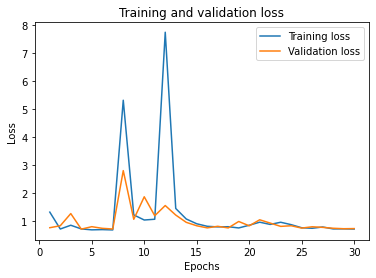

In [28]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss') 
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

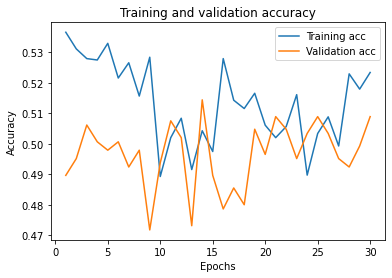

In [29]:
plt.clf() # 그래프를 초기화합니다. ['binary_accuracy']['val_binary_accuracy']
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델기반 예측값 성능평가

In [30]:
train_pred = model.predict(x_train) #훈련값으로 예측 (y_test랑 비교예정)
test_pred = model.predict(x_test) #예측값으로 예측 (y_test랑 비교예정)

In [31]:
test_pred = test_pred.flatten().tolist()

for i in range(len(test_pred)):
    if test_pred[i] >=0.5:
        test_pred[i]=1
    else:
        test_pred[i]=0

lstm_pred = np.array(test_pred)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score


def get_clf_eval(y_test, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    
    print('오차행렬')
    print(confusion)
    print(classification_report(y_test, pred))
    print('정확도 :', round(accuracy, 2), '정밀도 :', round(precision, 2), '재현율 :', round(recall, 2), 
         'F1 :', round(f1,2))

In [33]:
# lstm

get_clf_eval(y_test, lstm_pred)

오차행렬
[[ 21 339]
 [ 18 349]]
              precision    recall  f1-score   support

           0       0.54      0.06      0.11       360
           1       0.51      0.95      0.66       367

    accuracy                           0.51       727
   macro avg       0.52      0.50      0.38       727
weighted avg       0.52      0.51      0.39       727

정확도 : 0.51 정밀도 : 0.51 재현율 : 0.95 F1 : 0.66


In [19]:
# # 3차원 x_train 데이터를 2차원으로 변형
# nsamples, nx, ny = x_train.shape
# d2_x_train=x_train.reshape(nsamples, nx*ny)
# # 3차원 x_test 데이터를 2차원으로 변형
# nsamples, nx, ny = x_test.shape
# d2_x_test=x_test.reshape(nsamples, nx*ny)

In [34]:
temp_df = x.iloc[train_test_split-1+window_size:-1, :]
temp_df['lstm_pred'] = lstm_pred

temp_df

점수      긍정개수      부정개수      긍정비율      부정비율     종가-시가  \
Date                                                                     
2018-12-18  0.358779  0.090909  0.290323  0.075299  0.228545  0.617318   
2018-12-19  0.404580  0.022727  0.193548  0.018337  0.148416  0.635748   
2018-12-20  0.473282  0.113636  0.064516  0.100859  0.054422  0.587730   
2018-12-21  0.404580  0.113636  0.290323  0.108349  0.263087  0.631827   
2018-12-24  0.458015  0.136364  0.064516  0.125285  0.056335  0.616997   
...              ...       ...       ...       ...       ...       ...   
2021-11-23  0.396947  0.068182  0.161290  0.111497  0.250676  0.544061   
2021-11-24  0.419847  0.090909  0.129032  0.147672  0.199205  0.557536   
2021-11-25  0.412214  0.022727  0.064516  0.039980  0.107863  0.541780   
2021-11-26  0.343511  0.045455  0.225806  0.090512  0.427343  0.470020   
2021-11-29  0.427481  0.090909  0.129032  0.112281  0.151463  0.611792   

            감성어_Change  감성어5일_Change  감성어5일이동평균     new점수   new긍정개수   new부정개수  \
Date                                                                            
2018-12-18    0.532258      0.333898        1.8  0.498340  0.497568  0.404742   
2018-12-19    0.500000      0.355932        0.4  0.717402  0.656011  0.206605   
2018-12-20    0.535484      0.328814       -1.2  0.476529  0.449618  0.385267   
2018-12-21    0.540323      0.360169       -0.8  0.589379  0.494093  0.237934   
2018-12-24    0.541219      0.395480       -2.6  0.480797  0.420431  0.342083   
...                ...           ...        ...       ...       ...       ...   
2021-11-23    0.498925      0.345763       -2.4  0.443812  0.216122  0.159187   
2021-11-24    0.500000      0.347458       -3.8  0.490754  0.241140  0.105843   
2021-11-25    0.519713      0.327684       -4.4  0.471788  0.218902  0.112616   
2021-11-26    0.524194      0.320621       -4.6  0.451399  0.187630  0.110923   
2021-11-29    0.397849      0.254237       -4.4  0.422475  0.232801  0.217612   

             new긍정비율   new부정비율  new종가-시가  new감성어_Change  new감성어5일_Change  \
Date                                                                       
2018-12-18  0.539092  0.419796  0.617318       0.117031         0.160986   
2018-12-19  0.740826  0.142911  0.635748       0.120636         0.165899   
2018-12-20  0.517342  0.431297  0.587730       0.110455         0.166537   
2018-12-21  0.642435  0.242915  0.631827       0.120295         0.166497   
2018-12-24  0.495704  0.386156  0.616997       0.115074         0.165549   
...              ...       ...       ...            ...              ...   
2021-11-23  0.448501  0.303522  0.544061       0.112646         0.162607   
2021-11-24  0.514372  0.158327  0.557536       0.119946         0.166844   
2021-11-25  0.504710  0.202421  0.541780       0.117900         0.165032   
2021-11-26  0.488024  0.241743  0.470020       0.117633         0.161776   
2021-11-29  0.329607  0.314063  0.611792       0.116259         0.164559   

            new비율점수  new감성어5일이동평균  lstm_pred  
Date                                           
2018-12-18      1.0         391.4           1  
2018-12-19      1.0         301.4           1  
2018-12-20      1.0         294.2           1  
2018-12-21      1.0         301.4           1  
2018-12-24      1.0         316.0           1  
...             ...           ...         ...  
2021-11-23      1.0         214.8           1  
2021-11-24      1.0         182.6           1  
2021-11-25      1.0         196.0           1  
2021-11-26      1.0         182.2           1  
2021-11-29      1.0         137.2           0  

[727 rows x 20 columns]

In [35]:
val_df = pd.merge(temp_df,kospi_df, how='left',left_index=True,right_index=True)

In [36]:
val_df['gap'] = (val_df.Close - val_df.Open) / val_df.Open # (당일종가 - 당일시가) / 당일시가
val_df['gap-1'] = val_df['gap'].shift(-1) # 다음날 증감으로 변경

In [37]:
val_df['lstm_cum'] = val_df['lstm_pred'] * val_df['gap-1']

# 백테스팅 결과 시각화

In [42]:
back_df = pd.DataFrame()
back_df['LSTM'] = val_df.lstm_cum.cumsum()

<AxesSubplot:xlabel='Date'>

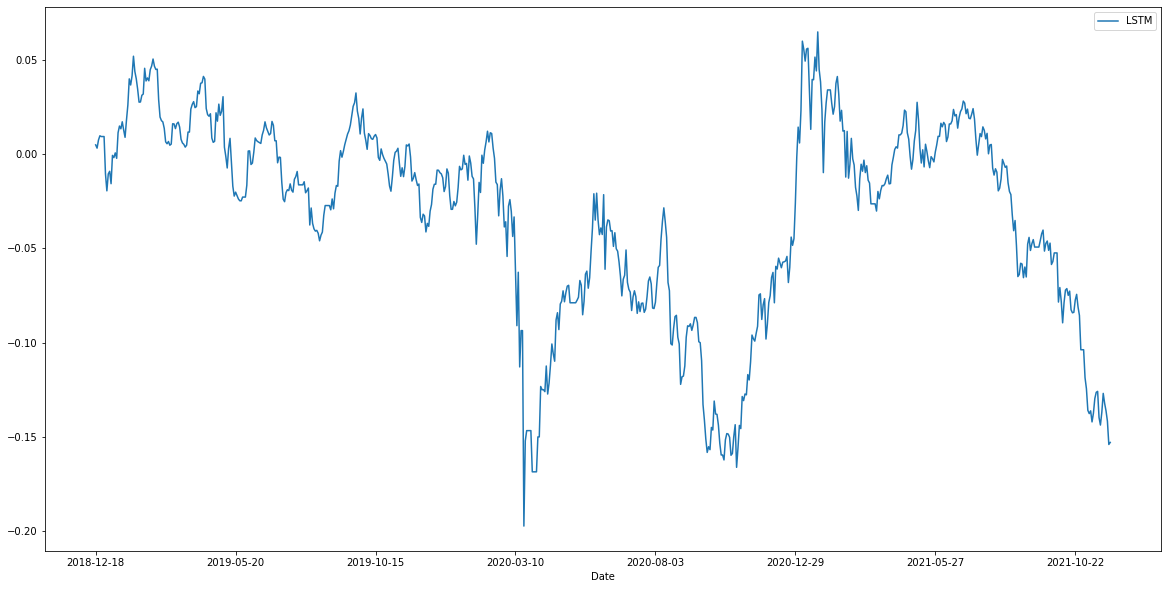

In [43]:
# 머신러닝 보다 백테스팅 결과가 좋지 않았음. 
back_df.plot(figsize = (20,10))